In [1]:
import numpy as np
import mpmath as mat
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from scipy import ndimage

In [2]:
rcParams['savefig.dpi'] = 1000
rcParams['figure.dpi'] = 1000
# rcParams['font.family'] = 'Lucida Bright'
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

## 2D Hybride bottom file creation

### Reading 2D low res bottom File

In [3]:
work_path = ""
file_name = "Eastbourne_01_SWAN"

low_bot = np.loadtxt(work_path+file_name+".bot")
low_bot_zoom = ndimage.zoom(low_bot,[30.9111969112/2,19.5637065637/2])

### Reading high res bottom File

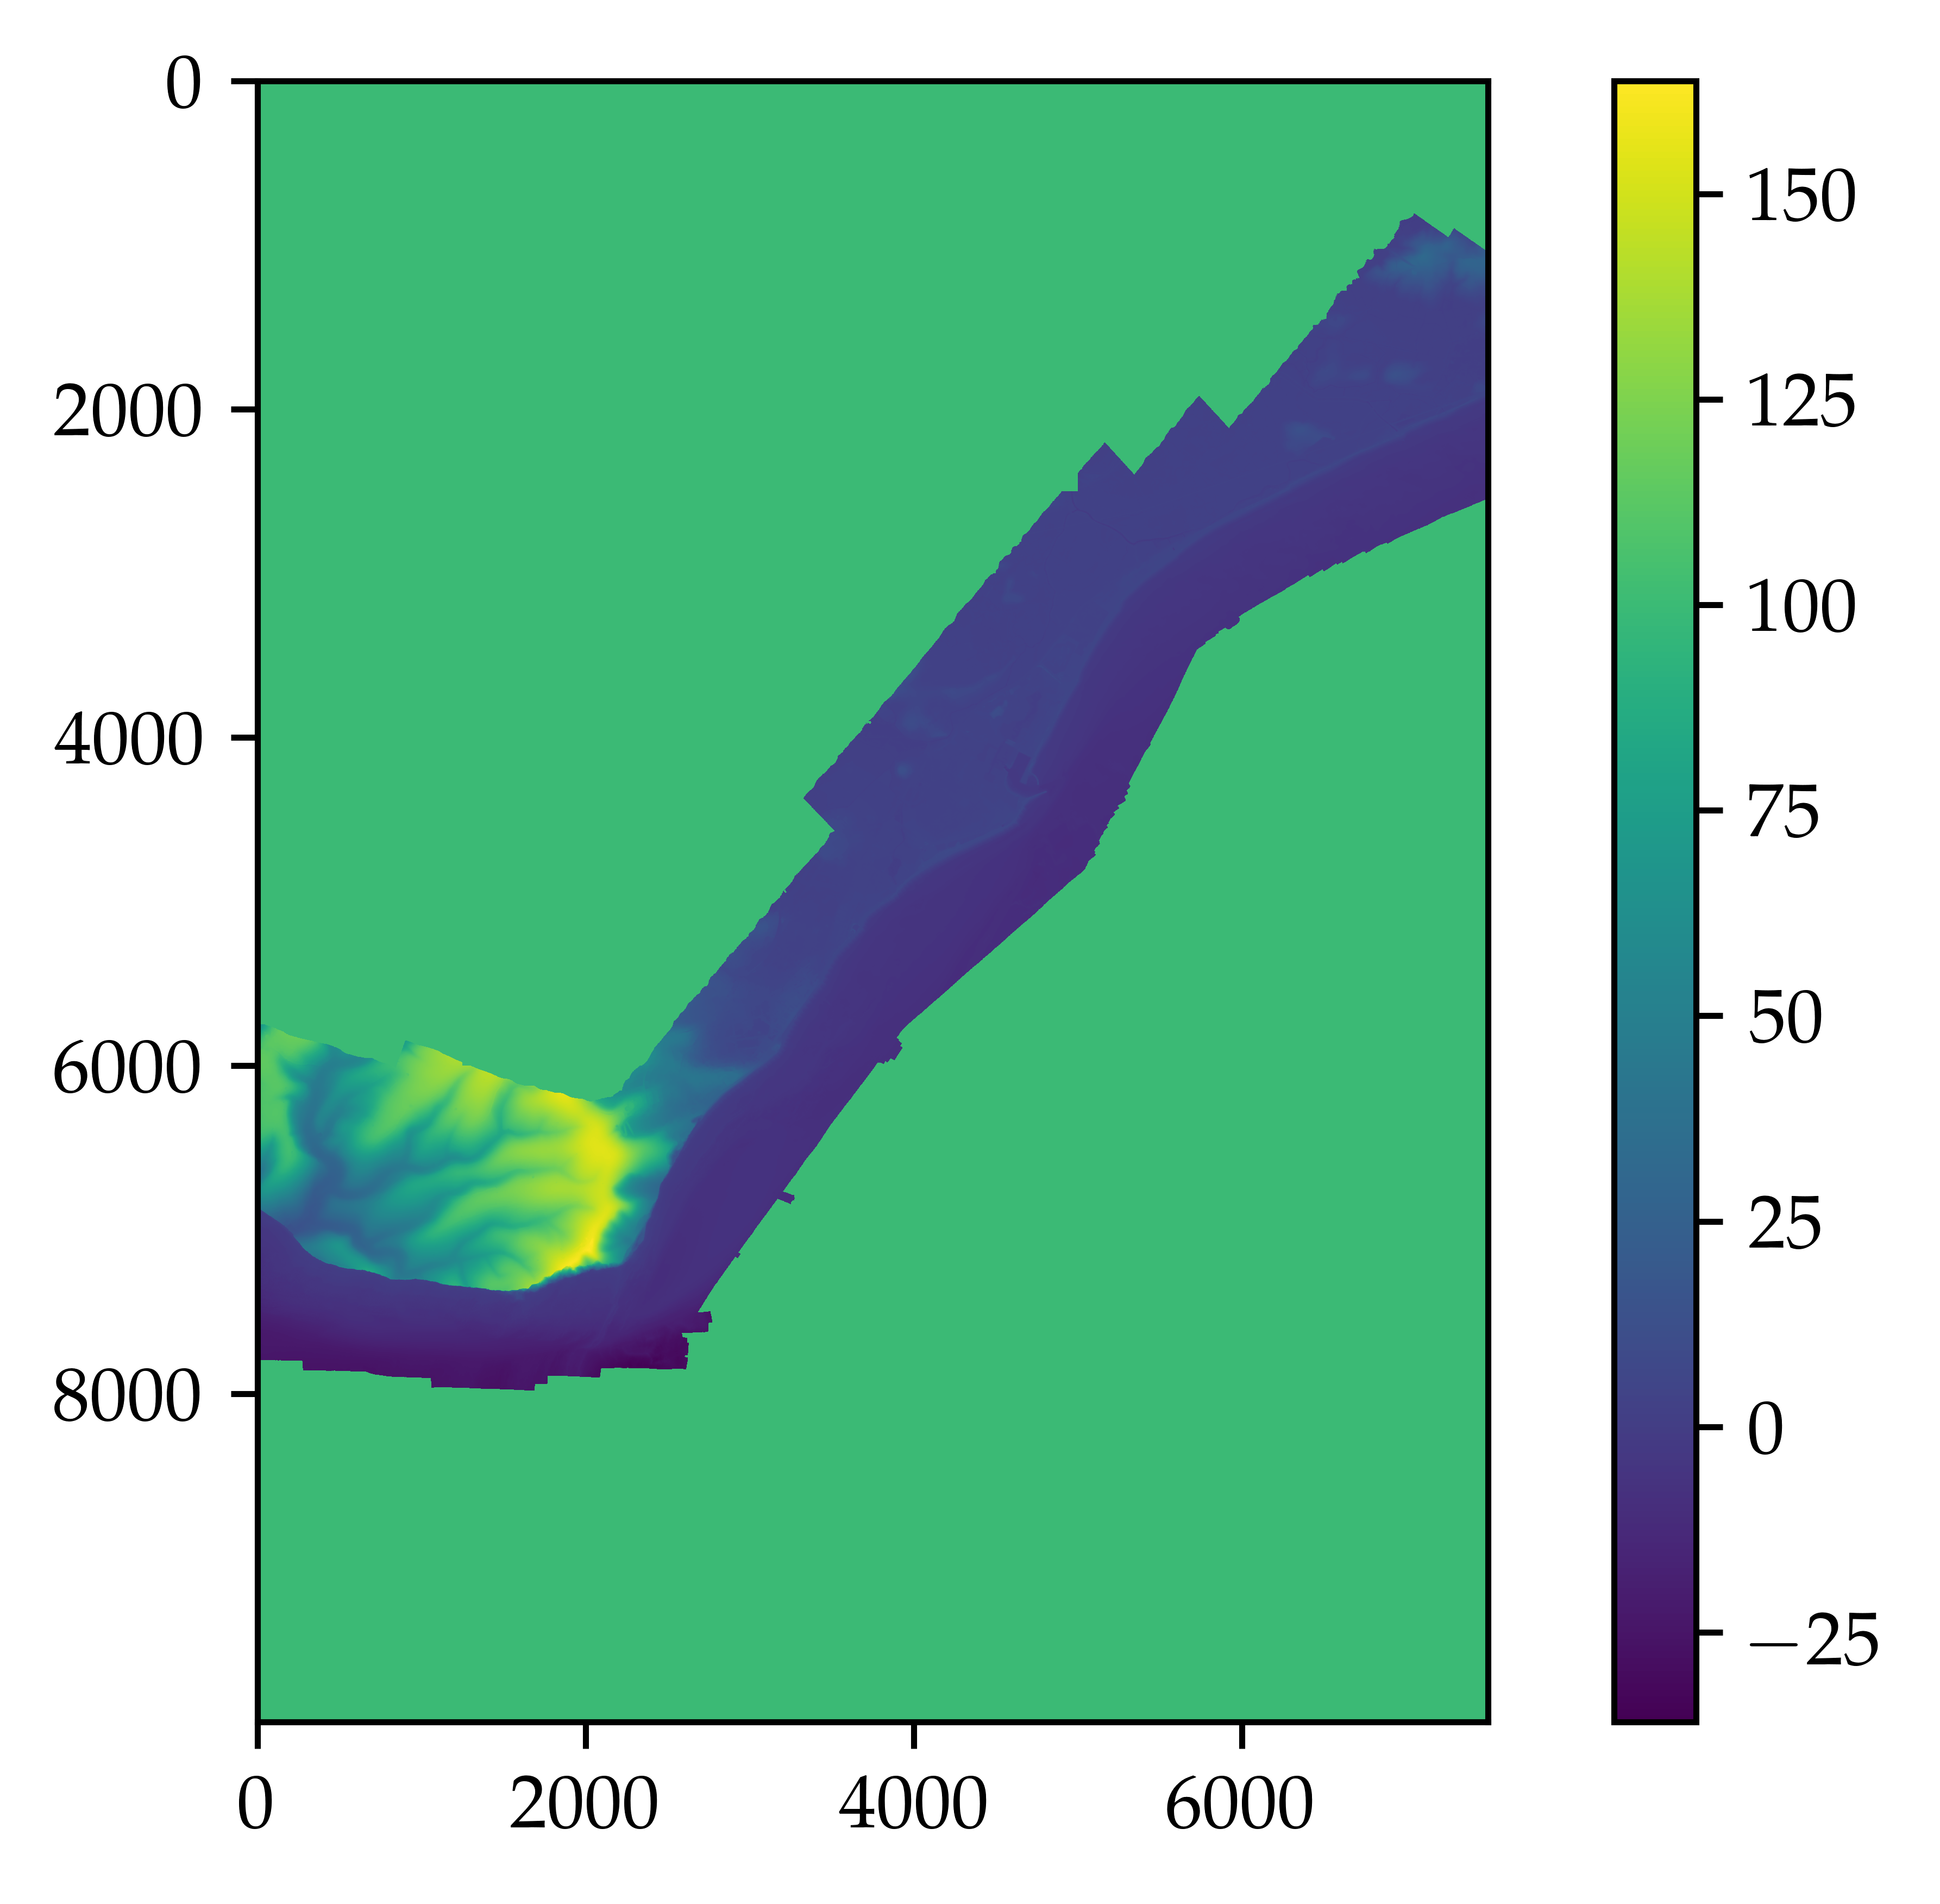

In [4]:
work_path = ""
file_name = "full_high_res"

high_bot = np.loadtxt(work_path+file_name+".bot")
plt.imshow(high_bot)
plt.colorbar()

C:\Users\ianmu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


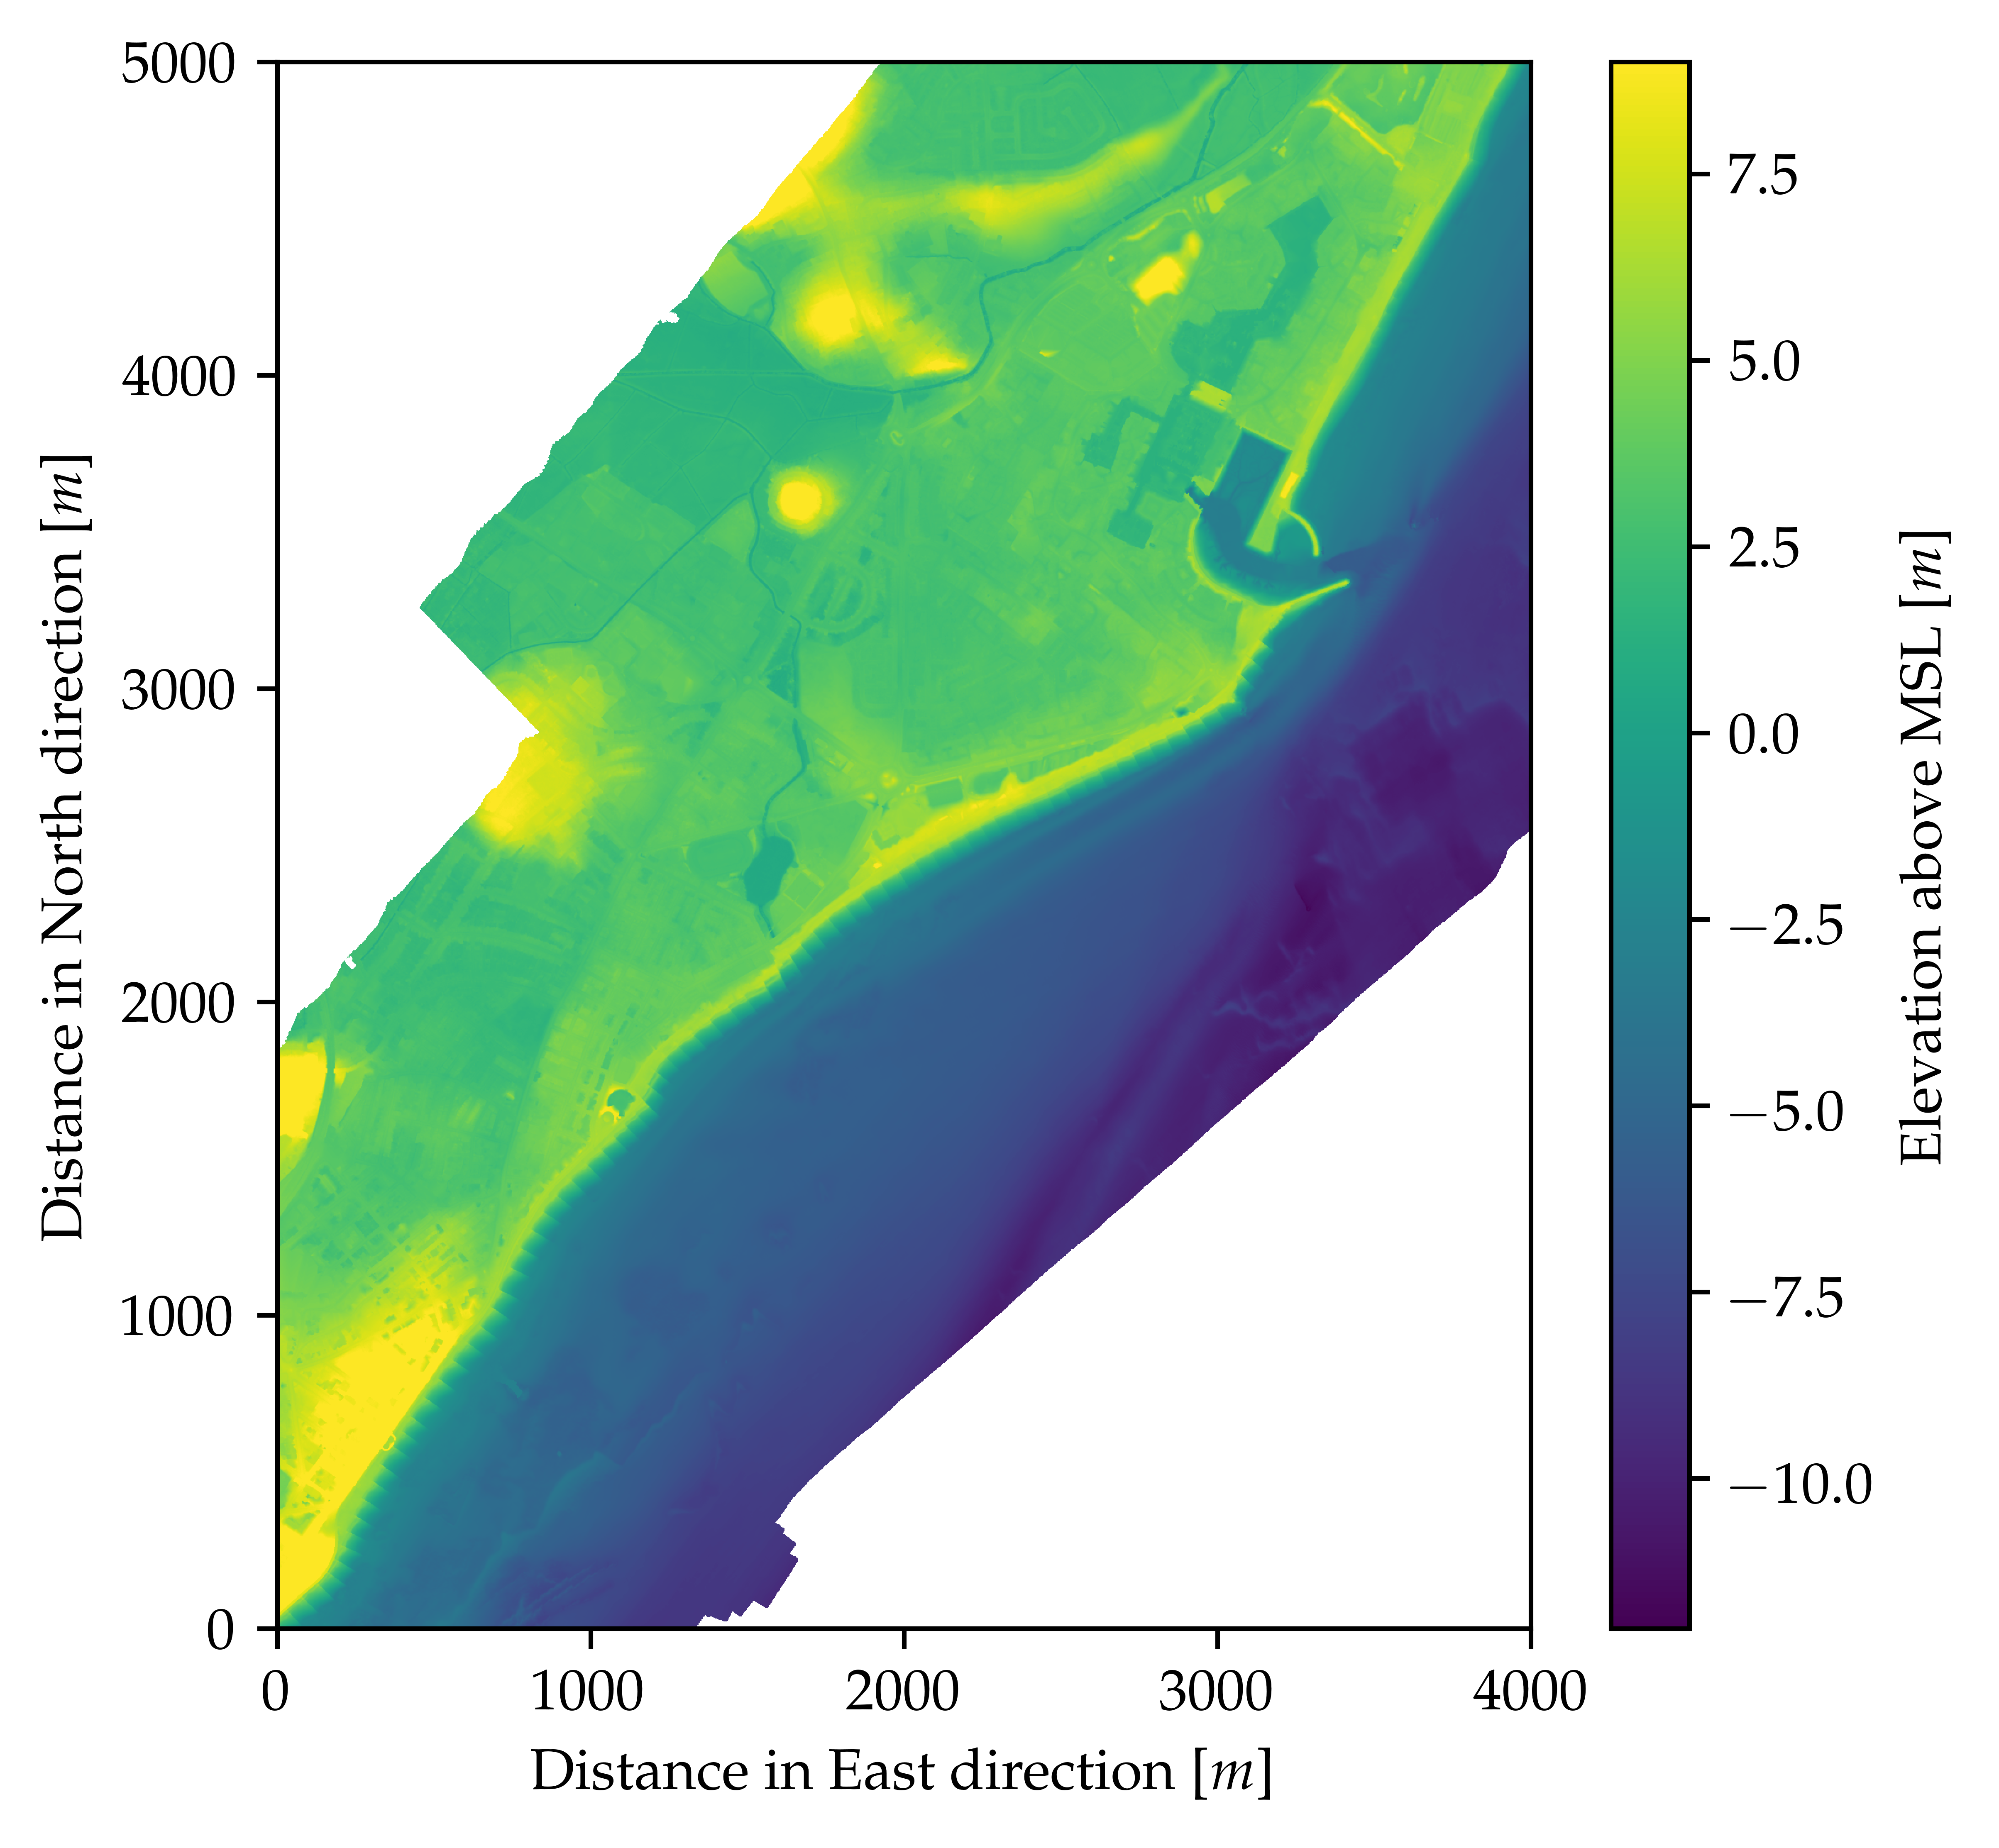

In [56]:
# looking at the file
high_bot[high_bot>99] = np.nan
ymax = 6000
ymin = ymax-2500

xmin = 3000-400+500
xmax = xmin+3100-600-500

locs_0 = np.array(([8480-4840,8300-3000],[9430-4840,7620-3000],[9800-4840,7030-3000]))
# plt.imshow(high_bot)
plt.figure(figsize=[5,5])
plt.plot(figsize=[40,40])
plt.imshow(high_bot[ymin:ymax,xmin:xmax],vmax = 9,extent=[0,(xmax-xmin)*2,0,(ymax-ymin)*2])
plt.xlabel('Distance in East direction [$m$]')
plt.ylabel('Distance in North direction [$m$]')
# for i in range(len(locs_0)):
#     if (locs_0[i,0]<xmax):
#         print(locs_0[i,0])
#         if (locs_0[i,1]<ymax):
#             print()
#             plt.plot(locs_0[i,0]-xmin, ymax-locs_0[i,1],'.')
cbar = plt.colorbar()
cbar.set_label('Elevation above MSL [$m$]')

In [ ]:
# looking at the file
high_bot[high_bot>99] = np.nan
ymax = 6000-1000
ymin = ymax-2500 +2000

xmin = 3000-400+500+750+350
xmax = xmin+3100-600-500-750-500-300

locs_0 = np.array(([8480-4840,8300-3000],[9430-4840,7620-3000],[9800-4840,7030-3000]))

n = 91
# plt.imshow(high_bot)
plt.figure(figsize=[5,5])
plt.plot(figsize=[40,40])
# plt.imshow(high_bot[ymin:ymax,xmin:xmax],vmin=0,vmax = 9,extent=[0,(xmax-xmin)*2,0,(ymax-ymin)*2])
plt.imshow(high_bot[ymin:ymax,xmin-int((n-1)/2):xmax][:,:n],vmin=0,vmax = 9,extent=[0,(xmax-xmin)*2,0,(ymax-ymin)*2])
plt.xlabel('Distance in East direction [$m$]')
plt.ylabel('Distance in North direction [$m$]')
# for i in range(len(locs_0)):
#     if (locs_0[i,0]<xmax):
#         print(locs_0[i,0])
#         if (locs_0[i,1]<ymax):
#             print()
#             plt.plot(locs_0[i,0]-xmin, ymax-locs_0[i,1],'.')
cbar = plt.colorbar()
cbar.set_label('Elevation above MSL [$m$]')

max_list = []
plt.figure()

for i in range (n):
    plt.plot(high_bot[ymin:ymax,xmin-int((n-1)/2)+i:xmax][:,0][125:250])
    max_list.append(np.percentile(high_bot[ymin:ymax,xmin-25+i:xmax][:,0][125:250],98))
np.average(max_list)

### Creating hydride bottom file

In [5]:
x_shift = 4840
y_shift = 3000
hybride_bot = -low_bot_zoom -3.09115637461
hybride_bot[y_shift:y_shift+10000,x_shift:x_shift+7500][np.invert(np.isclose(high_bot,99.9999))] = high_bot[np.invert(np.isclose(high_bot,99.9999))]

del low_bot_zoom
del low_bot
del high_bot

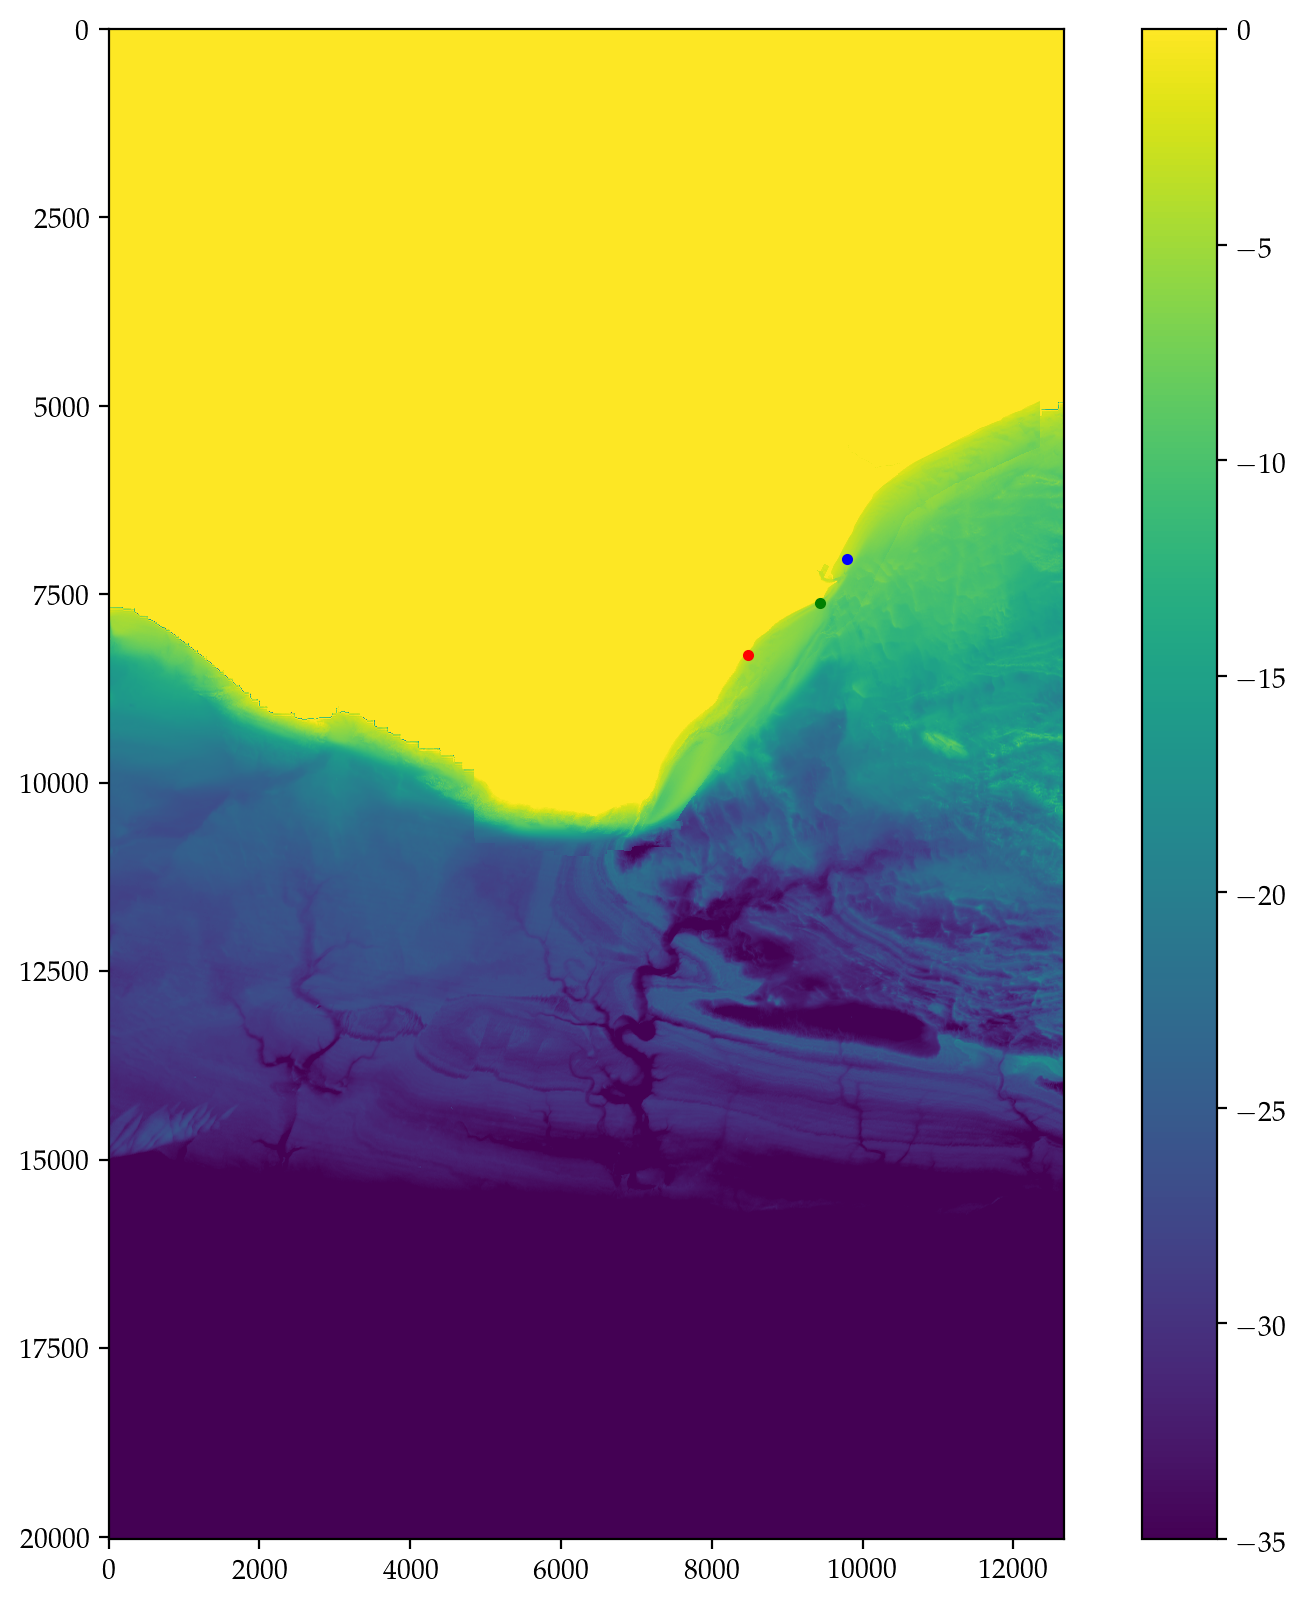

In [6]:
plt.figure(figsize=[10,10])
plt.imshow(hybride_bot,vmax=0, vmin=-35)
locs_0 = [8480,8300],[9430,7620],[9800,7030]
plt.plot(locs_0[0][0],locs_0[0][1],'r.')
plt.plot(locs_0[1][0],locs_0[1][1],'g.')
plt.plot(locs_0[2][0],locs_0[2][1],'b.')
plt.colorbar()

In [7]:
# np.savetxt("../../../Schenarios/hybride_2D.bot",hybride_bot,delimiter = ' ')
len(hybride_bot)

20030

## Creation 1D hybride cross sections

### Locations

In [1]:
# plt.imshow(-hybride_bot,vmin=-5,vmax = 10)
locs_0 = [8480,8300],[9430,7620],[9800,7030]
angles = [45, 60, 27]

In [2]:
# bot_rot_1 = ndimage.rotate(-hybride_bot,angles[0],cval=-99)
cross_1 = bot_rot_1[8820,:][bot_rot_1[8820,:]>-20]
cross_1_3 = cross_1
cross_1_3[1121:] = cross_1_3[1121:]-0.35
cross_1_3[1121] = cross_1_3[1121]+0.17

cross_1_2 = np.flip(cross_1_3[526-250:1526])

plt.figure(figsize = [8,3])
plt.plot(np.arange(len(cross_1_2))*2,cross_1_2,'k') 
plt.plot([0,2000],[0,0],'tab:blue')
plt.title('Cross section location 1')
plt.xlabel('Distance from coupling point [m]')
plt.ylabel('Bathymetry [m]')
# # del bot_rot_1
np.savetxt('SWASH1D_loc1.bot',cross_1_2)

NameError: name 'bot_rot_1' is not defined

In [37]:
# bot_rot_2 = ndimage.rotate(-hybride_bot,angles[1],cval=-99)
# cross_2 = bot_rot_2[6620,:][bot_rot_2[6620,:]>-20]
cross_2_3 = cross_2
cross_2_3[1634:] = cross_2_3[1634:]+0.8

cross_2_2 =  np.flip(cross_2_3[1136-250:2136])

plt.figure(figsize = [8,3])
plt.plot(np.arange(len(cross_2_2))*2,cross_2_2,'k') 
plt.plot([0,2000],[0,0],'tab:blue')
plt.title('Cross section location 2')
plt.xlabel('Distance from coupling point [m]')
plt.ylabel('Bathymetry [m]')
# del bot_rot_2
np.savetxt('SWASH1D_loc2.bot',cross_2_2)

NameError: name 'cross_2' is not defined

In [22]:
df1

Tsec  Watlev   Botlev      Xp    Depth
0         300.0 -0.0573  18.5703     0.0  18.5027
1         300.0 -0.1296  18.5600     2.0  18.4224
2         300.0 -0.1710  18.5520     5.0  18.3755
3         300.0 -0.1262  18.5465     7.0  18.4177
4         300.0  0.0299  18.5439    10.0  18.5737
5         300.0  0.2568  18.5441    12.0  18.8009
6         300.0  0.4189  18.5473    14.0  18.9662
7         300.0  0.4002  18.5534    17.0  18.9535
8         300.0  0.2141  18.5620    19.0  18.7761
9         300.0 -0.0108  18.5730    22.0  18.5622
10        300.0 -0.1572  18.5858    24.0  18.4286
11        300.0 -0.1711  18.6000    26.0  18.4289
12        300.0 -0.0574  18.6150    29.0  18.5576
13        300.0  0.1190  18.6303    31.0  18.7494
14        300.0  0.2482  18.6455    34.0  18.8936
15        300.0  0.2315  18.6600    36.0  18.8915
16        300.0  0.0428  18.6734    38.0  18.7162
17        300.0 -0.2537  18.6855    41.0  18.4318
18        300.0 -0.5647  18.6960    43.0  18.1313
19        300.0 -0.8231  18.7050    46.0  17.8819
20        300.0 -1.0024  18.7126    48.0  17.7102
21        300.0 -1.1048  18.7188    50.0  17.6140
22        300.0 -1.1472  18.7239    53.0  17.5768
23        300.0 -1.1405  18.7281    55.0  17.5876
24        300.0 -1.0940  18.7316    58.0  17.6377
25        300.0 -1.0080  18.7347    60.0  17.7268
26        300.0 -0.8805  18.7377    62.0  17.8571
27        300.0 -0.7127  18.7406    65.0  18.0279
28        300.0 -0.5162  18.7436    67.0  18.2274
29        300.0 -0.3165  18.7468    70.0  18.4304
...         ...     ...      ...     ...      ...
2658970  2958.0 -1.2966   6.2593  2330.0   4.9497
2658971  2958.0 -1.2833   6.2463  2332.0   4.9619
2658972  2958.0 -1.2717   6.2452  2335.0   4.9349
2658973  2958.0 -1.2608   6.2066  2337.0   4.9112
2658974  2958.0 -1.2491   6.1720  2339.0   4.9005
2658975  2958.0 -1.2356   6.1496  2342.0   4.9050
2658976  2958.0 -1.2200   6.1406  2344.0   4.9045
2658977  2958.0 -1.2002   6.1245  2347.0   4.8720
2658978  2958.0 -1.1747   6.0722  2349.0   4.8543
2658979  2958.0 -1.1414   6.0290  2351.0   4.8696
2658980  2958.0 -1.0992   6.0109  2354.0   4.8934
2658981  2958.0 -1.0480   5.9926  2356.0   4.9058
2658982  2958.0 -0.9896   5.9538  2359.0   4.8887
2658983  2958.0 -0.9296   5.8783  2361.0   4.9046
2658984  2958.0 -0.8766   5.8342  2363.0   4.9152
2658985  2958.0 -0.8357   5.7919  2366.0   4.8976
2658986  2958.0 -0.8069   5.7333  2368.0   4.8347
2658987  2958.0 -0.7837   5.6416  2371.0   4.7467
2658988  2958.0 -0.7526   5.5304  2373.0   4.6462
2658989  2958.0 -0.7072   5.3988  2376.0   4.5030
2658990  2958.0 -0.6557   5.2102  2378.0   4.3791
2658991  2958.0 -0.6288   5.0348  2380.0   4.2163
2658992  2958.0 -0.6054   4.8451  2383.0   4.0171
2658993  2958.0 -0.5627   4.6225  2385.0   3.7824
2658994  2958.0 -0.4917   4.3451  2388.0   3.6253
2658995  2958.0 -0.3880   4.1170  2390.0   3.5101
2658996  2958.0 -0.2575   3.8981  2392.0   3.4476
2658997  2958.0 -0.1132   3.7050  2395.0   3.3807
2658998  2958.0  0.0251   3.4938  2397.0   3.3083
2658999  2958.0  0.1414   3.2832  2400.0   3.1959

[2659000 rows x 5 columns]

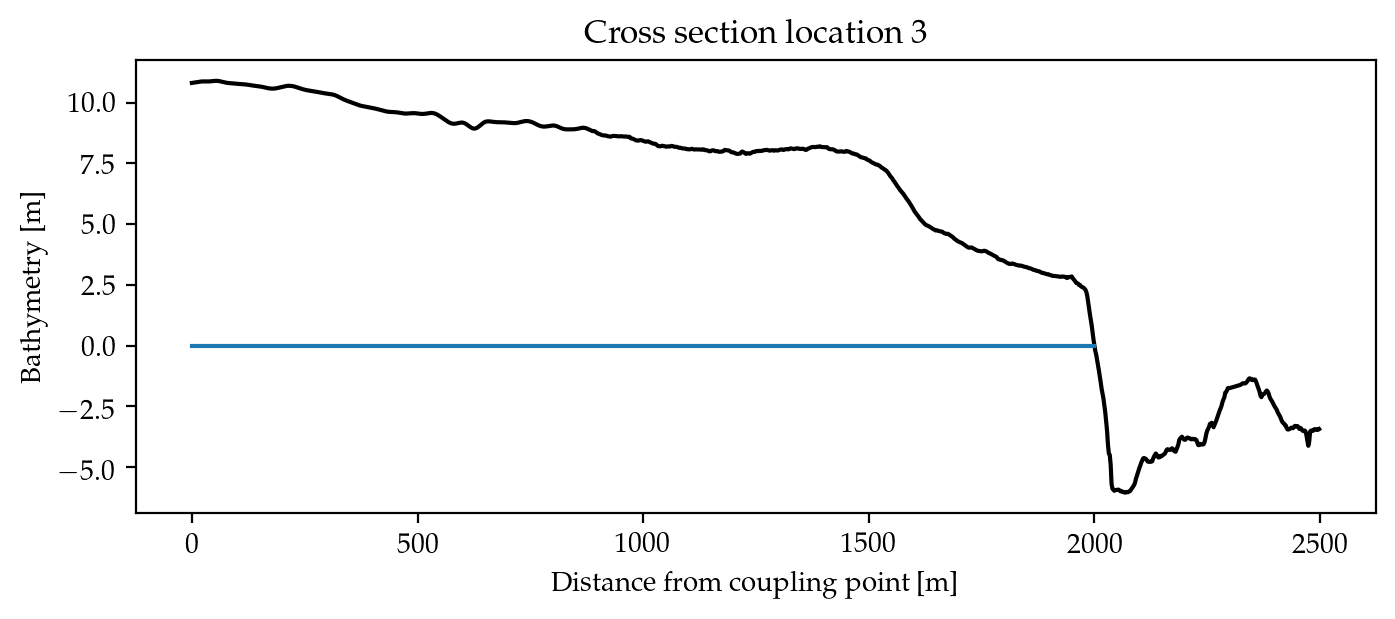

In [205]:
# bot_rot_3 = ndimage.rotate(-hybride_bot,angles[2],cval=-99)
# cross_3 = bot_rot_3[7530,:][bot_rot_3[7530,:]>-10]
cross_3_3 = cross_3
cross_3_3[1470:] = cross_3_3[1470:] + 0.7
cross_3_3[1469] = cross_3_3[1469] + 0.55
cross_3_3[1470] = cross_3_3[1470] + 0.06

cross_3_2 = np.flip(cross_3_3[917-250:1917])
plt.figure(figsize = [8,3])
plt.plot(np.arange(len(cross_3_2))*2,cross_3_2,'k') 
plt.plot([0,2000],[0,0],'tab:blue')
plt.title('Cross section location 3')
plt.xlabel('Distance from coupling point [m]')
plt.ylabel('Bathymetry [m]')
# del bot_rot_3
np.savetxt('SWASH1D_loc3.bot',cross_3_2)

### Looking at the files

(2000, 2200)

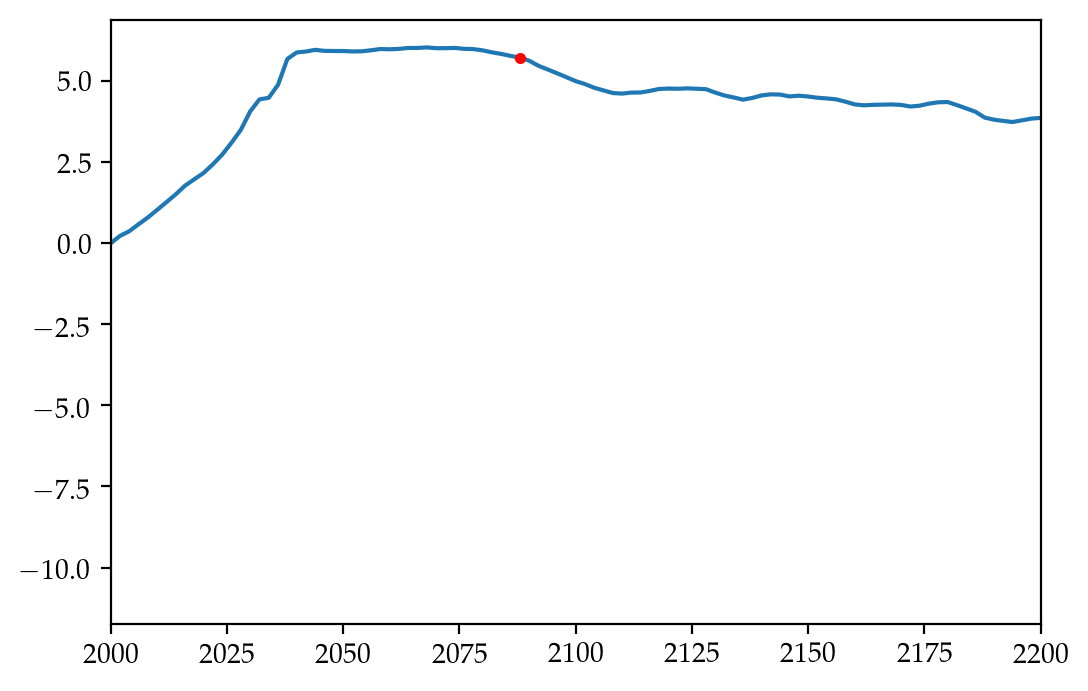

In [47]:
# swan_depth = np.loadtxt("SWAN_depth_loc1.txt")
swash_bot = np.loadtxt("SWASH1D_loc3.bot")

# shift = -1110
# cp = 1550.0

# plt.plot(swan_depth[0],swan_depth[1]-3.1298)
# plt.plot(np.arange(len(swash_bot))*2+shift, swash_bot)
# # plt.xlim([10000,15000])

# swash_bot = swash_bot[:int(round((cp-shift)/2))]
# plt.plot(np.arange(len(swash_bot))*2+shift,swash_bot)

plt.plot(np.arange(len(swash_bot))*2,-swash_bot)

a = 2088
plt.plot(np.arange(len(swash_bot))[round(a/2)]*2,-swash_bot[round(a/2)],'r.')
plt.xlim(2000,2200)

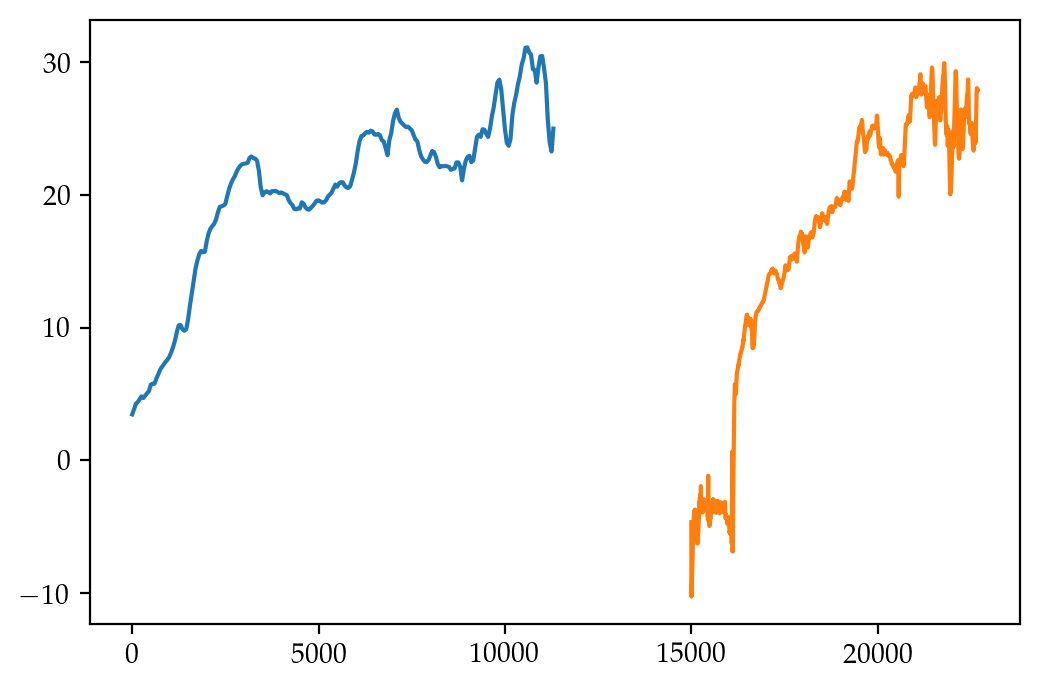

In [89]:
## swan_depth = np.loadtxt("SWAN_depth_loc2.txt")
swash_bot = np.loadtxt("SWASH1D_loc2.bot")

plt.plot(swan_depth[0],swan_depth[1]-3.1298)
plt.plot(np.arange(len(swash_bot))+15000, swash_bot)

### Wind direction scaling

In [48]:
angles = 45+90, 30+90, 63+90
dirs = 20, 20, 20, 20, 20, 20, 20, 207
mod10s = 24.7287391, 24.2622843, 22.2268921, 20.4147644, 18.7106744, 14.7557816, 12.6872486, 19.5848211

u10 = np.zeros([8,3])
for scenario in range(1,9):
    print(scenario,[3.217853397,3.129784897,3.011694997,2.882887097,2.818109797,2.674751097,2.506357897,2.938605197][scenario-1])
    for loc in range(1,4):
        u10[scenario-1,loc-1] = np.cos((angles[loc-1]-dirs[scenario-1])/180*np.pi)*mod10s[scenario-1]
u10

1 3.217853397
2 3.129784897
3 3.011694997
4 2.882887097
5 2.818109797
6 2.674751097
7 2.506357897
8 2.938605197


array([[-10.45081673,  -4.29410048, -16.86495951],
       [-10.25368442,  -4.21310145, -16.5468381 ],
       [ -9.3934905 ,  -3.85965931, -15.15870396],
       [ -8.62765224,  -3.54498664, -13.92283584],
       [ -7.90747269,  -3.24907451, -12.76064926],
       [ -6.23606277,  -2.56231458, -10.06341885],
       [ -5.36186295,  -2.2031176 ,  -8.65268274],
       [  6.05204255,   1.02499034,  11.51166901]])

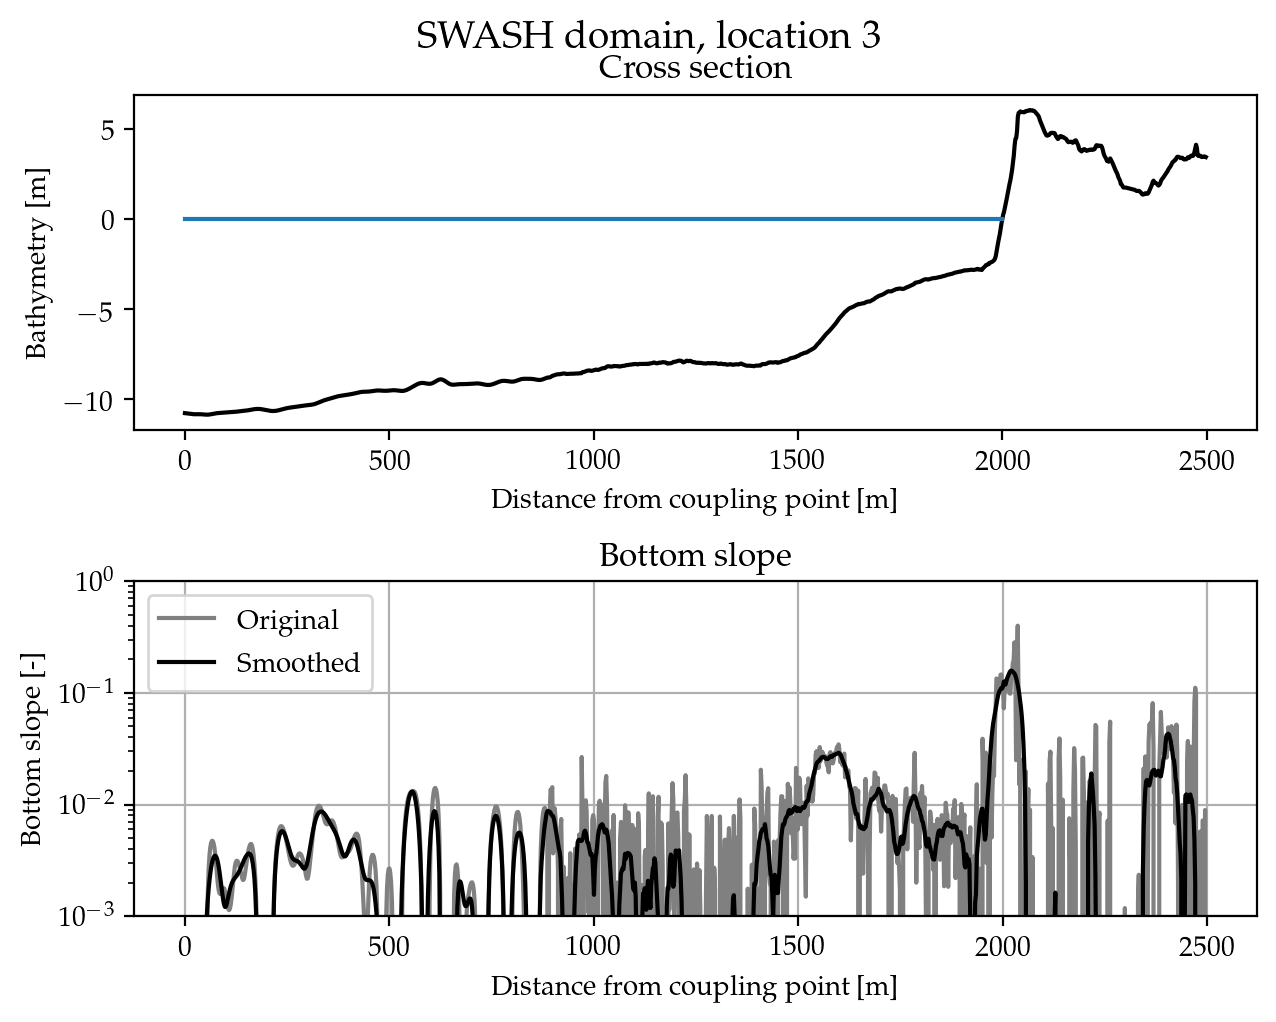

In [140]:
bot_list = []
k=0
for i in range(3):# i = loc - 1
    botfile = 'C:/Users/ianmu/OneDrive - Imperial College London/Thesis/Code/SWASH/1D/SWASH1D_loc'+str(i+1)+'.bot'
    bot_list.append(-np.flip(np.loadtxt(botfile)))
    
n=2
plt.figure(figsize=[8*.85,6*.85])
plt.suptitle('SWASH domain, location '+str(n+1), fontsize=14)
plt.subplot(2,1,1)
plt.title('Cross section')
plt.xlabel('Distance from coupling point [m]')
plt.ylabel('Bathymetry [m]')
plt.plot(np.arange(1250)*2,np.flip(bot_list[n]),'k')
plt.plot([0,2000],[0,0],'tab:blue')

slope = np.diff(np.flip(bot_list[n]))/2
from scipy.signal import savgol_filter
slopehat = savgol_filter(slope, 31, 3)

plt.subplot(2,1,2)
plt.tight_layout(pad=2)
plt.title('Bottom slope')
plt.xlabel('Distance from coupling point [m]')
plt.ylabel('Bottom slope [-]')
plt.ylim(0.001)
plt.grid()

plt.semilogy(np.arange(1,2499,2),slope,'gray',label='Original')
plt.semilogy(np.arange(1,2499,2),slopehat,'k',label='Smoothed')
plt.legend()